# Predict MVP 2021

In [7]:
import pickle
import pandas as pd

In [8]:
with open("player_stats.pkl", "rb") as f:
    season_2021 = pickle.load(f)
#tolgo seasons che non ci servono
season_2021 = season_2021[season_2021["SEASON_ID"] == 2021]

#sposto la colonna MVP per prima per comodita
cols = season_2021.columns.tolist()
cols = cols[-2:] + cols[:-2]
season_2021 = season_2021[cols]

season_2021["GP"]=season_2021["GP"].astype('int')
season_2021["FGM"]=season_2021["FGM"].astype('int')
season_2021["FGA"]=season_2021["FGA"].astype('int')
season_2021["FG3M"]=season_2021["FG3M"].astype('int')
season_2021["FG3A"]=season_2021["FG3A"].astype('int')
season_2021["FTM"]=season_2021["FTM"].astype('int')
season_2021["FTA"]=season_2021["FTA"].astype('int')
season_2021["OREB"]=season_2021["OREB"].astype('int')
season_2021["DREB"]=season_2021["DREB"].astype('int')
season_2021["REB"]=season_2021["REB"].astype('int')
season_2021["AST"]=season_2021["AST"].astype('int')
season_2021["STL"]=season_2021["STL"].astype('int')
season_2021["BLK"]=season_2021["BLK"].astype('int')
season_2021["TOV"]=season_2021["TOV"].astype('int')
season_2021["PF"]=season_2021["PF"].astype('int')
season_2021["PTS"]=season_2021["PTS"].astype('int')


season_2021

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
16,0.0,6,1630173,2021,1610612748,21.0,61,737.0,124,228,...,0.509,73,135,208,29,20,28,43,91,304
33,0.0,3,1629121,2021,1610612749,25.0,7,18.0,1,8,...,0.000,0,3,3,2,0,0,0,1,2
43,0.0,11,203500,2021,1610612740,27.0,58,1605.0,189,308,...,0.444,213,301,514,111,54,38,78,113,438
48,0.0,6,1628389,2021,1610612748,23.0,64,2143.0,456,800,...,0.799,142,431,573,346,75,66,169,145,1197
114,0.0,10,200746,2021,1610612759,35.0,21,544.0,115,248,...,0.838,17,77,94,36,8,18,20,36,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,0.0,12,1626153,2021,1610612758,29.0,27,696.0,104,225,...,0.833,28,77,105,97,43,11,35,30,271
5935,0.0,11,201152,2021,1610612741,33.0,68,1652.0,370,662,...,0.628,168,255,423,291,74,40,137,152,823
5939,0.0,5,1629027,2021,1610612737,22.0,63,2125.0,487,1112,...,0.886,38,207,245,594,53,12,261,111,1594
5949,0.0,10,203469,2021,1610612766,28.0,48,1005.0,181,324,...,0.714,119,209,328,86,27,17,51,121,451


In [9]:
#standardizzazione i nostri dati per anno
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols = season_2021.columns
num_cols = num_cols.drop(["MVP",'CONF_RANK', 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID'])

season_2021_norm=pd.DataFrame()
season_2021_norm = pd.concat([season_2021_norm, season_2021],axis=0,ignore_index=True)


In [10]:

for col in num_cols.tolist():
    season_2021_norm[[col]] = scaler.fit_transform(season_2021[[col]].to_numpy().reshape(-1,1))

    #train_data.loc[train_data['SEASON_ID']==year, col]=scaler.fit_transform(train_features.loc[train_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))

season_2021_norm

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,0.0,6,1630173,2021,1610612748,-1.257404,1.110181,-0.139359,-0.124693,-0.253517,...,-0.971991,0.922316,0.136862,0.360073,-0.525843,-0.252584,0.512377,-0.053859,0.455060,-0.206183
1,0.0,3,1629121,2021,1610612749,-0.284732,-1.369898,-1.182109,-0.967188,-0.977057,...,-3.345226,-0.800402,-0.987759,-0.978440,-0.776748,-1.076972,-0.769883,-0.932511,-1.220961,-0.958489
2,0.0,11,203500,2021,1610612740,0.201604,0.972399,1.119483,0.320529,0.009588,...,-1.275057,4.226159,1.551158,2.358048,0.236164,1.148875,0.970327,0.661323,0.864754,0.127622
3,0.0,6,1628389,2021,1610612748,-0.771068,1.247963,1.899733,2.149360,1.627685,...,0.380146,2.550639,2.658739,2.743279,2.419965,2.014482,2.252587,2.520796,1.460673,2.018352
4,0.0,10,200746,2021,1610612759,2.146949,-0.726915,-0.419263,-0.186339,-0.187741,...,0.561986,-0.399221,-0.357290,-0.384271,-0.460794,-0.747217,0.054427,-0.523836,-0.569175,-0.246040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0.0,12,1626153,2021,1610612758,0.687940,-0.451350,-0.198820,-0.261684,-0.263384,...,0.538673,-0.139633,-0.357290,-0.312448,0.106065,0.695462,-0.266138,-0.217329,-0.680910,-0.288388
622,0.0,11,201152,2021,1610612741,1.660613,1.431673,1.187646,1.560298,1.173829,...,-0.417149,3.164210,1.159245,1.763879,1.908863,1.973263,1.061917,1.866916,1.591030,1.086688
623,0.0,5,1629027,2021,1610612737,-1.014236,1.202036,1.873628,2.361696,2.653796,...,0.785788,0.096356,0.750292,0.601658,4.724573,1.107656,-0.220343,4.400703,0.827509,3.007311
624,0.0,10,203469,2021,1610612766,0.444772,0.513125,0.249316,0.265732,0.062209,...,-0.016170,2.007865,0.767331,1.143593,0.003845,0.035952,0.008632,0.109611,1.013734,0.160006


## Predict 2021

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_2021_labels = season_2021_norm[["MVP"]]

with open("log_reg.pkl", "rb") as f:
    log_reg = pickle.load(f)

train_2021 = season_2021_norm[["GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", 'CONF_RANK']]
predicted_labels = log_reg.predict(train_2021)
print(f"The accuracy of the Logistic Regressor is  {accuracy_score(test_2021_labels,predicted_labels)}")


The accuracy of the Logistic Regressor is  0.9952076677316294


In [12]:
#Unisco i dataset
predict_2021 = pd.DataFrame(predicted_labels, columns=["MVP_Predict"])
predict_2021["PLAYER_ID"] = list(season_2021["PLAYER_ID"])

winners_id = predict_2021.loc[predict_2021["MVP_Predict"] == 1, "PLAYER_ID"]

In [13]:
from nba_api.stats.static import players

for id in list(winners_id):
    print(players.find_player_by_id(id))

{'id': 203507, 'full_name': 'Giannis Antetokounmpo', 'first_name': 'Giannis', 'last_name': 'Antetokounmpo', 'is_active': True}
{'id': 203954, 'full_name': 'Joel Embiid', 'first_name': 'Joel', 'last_name': 'Embiid', 'is_active': True}
{'id': 203497, 'full_name': 'Rudy Gobert', 'first_name': 'Rudy', 'last_name': 'Gobert', 'is_active': True}
{'id': 203999, 'full_name': 'Nikola Jokic', 'first_name': 'Nikola', 'last_name': 'Jokic', 'is_active': True}


### PROBABILITIES 2021

In [24]:

test_2021_labels = season_2021_norm[["MVP"]]

with open("log_reg.pkl", "rb") as f:
    log_reg = pickle.load(f)

train_2021 = season_2021_norm[["GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", 'CONF_RANK']]
predicted_labels = pd.DataFrame(log_reg.predict_proba(train_2021))

predicted_labels.rename(columns={0:'NOT',1:'MVP'},inplace=True)

predicted_labels = pd.DataFrame(predicted_labels, columns=["MVP"])
predicted_labels["PLAYER_ID"] = list(season_2021["PLAYER_ID"])

#Sort
mvp_candidates = predicted_labels.sort_values(by='MVP',ascending=False)

#Take only better
mvp_candidates = mvp_candidates.head(20)

mvp_candidates_names = pd.DataFrame()
for id in list(mvp_candidates["PLAYER_ID"]):
    name = pd.DataFrame.from_dict(players.find_player_by_id(id), orient="index")
    name = name.transpose()
    mvp_candidates_names = pd.concat([mvp_candidates_names,name], axis=0, ignore_index=True)

mvp_candidates_names["mvp_prob"] = list(mvp_candidates["MVP"])
mvp_candidates_names

,id,full_name,first_name,last_name,is_active,mvp_prob
0,203999,Nikola Jokic,Nikola,Jokic,True,0.999803
1,203954,Joel Embiid,Joel,Embiid,True,0.943049
2,203497,Rudy Gobert,Rudy,Gobert,True,0.750389
3,203507,Giannis Antetokounmpo,Giannis,Antetokounmpo,True,0.716074
4,1628378,Donovan Mitchell,Donovan,Mitchell,True,0.312791
5,1629029,Luka Doncic,Luka,Doncic,True,0.213487
6,202699,Tobias Harris,Tobias,Harris,True,0.193666
7,101108,Chris Paul,Chris,Paul,True,0.148821
8,201935,James Harden,James,Harden,True,0.104145
9,203944,Julius Randle,Julius,Randle,True,0.066704


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nikola Jokic'),
  Text(1, 0, 'Joel Embiid'),
  Text(2, 0, 'Rudy Gobert'),
  Text(3, 0, 'Giannis Antetokounmpo'),
  Text(4, 0, 'Donovan Mitchell'),
  Text(5, 0, 'Luka Doncic'),
  Text(6, 0, 'Tobias Harris'),
  Text(7, 0, 'Chris Paul'),
  Text(8, 0, 'James Harden'),
  Text(9, 0, 'Julius Randle')])

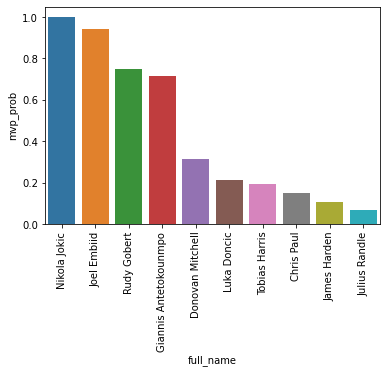

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#mvp_candidates_names.plot.bar(x='full_name',y='mvp_prob' )
sns.barplot(x='full_name',y='mvp_prob',data=mvp_candidates_names.head(10))
plt.xticks(rotation=90)